In [1]:
# Importar librerías necesarias
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
!pip install mglearn
import mglearn #NO ESTA EN COLAB. INSTALAR CON PIP
%matplotlib inline

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=fe1f8fd92a7220fab8c29e4591f3aa96dc9bac46f880e4a3ce3705c211d98939
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
#display(cancer)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [5]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Training set score", tree.score(X_train, y_train))
print("Test set score", tree.score(X_test, y_test))

Training set score 1.0
Test set score 0.9370629370629371


In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Training set score", tree.score(X_train, y_train))
print("Test set score", tree.score(X_test, y_test))

Training set score 0.9882629107981221
Test set score 0.951048951048951


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

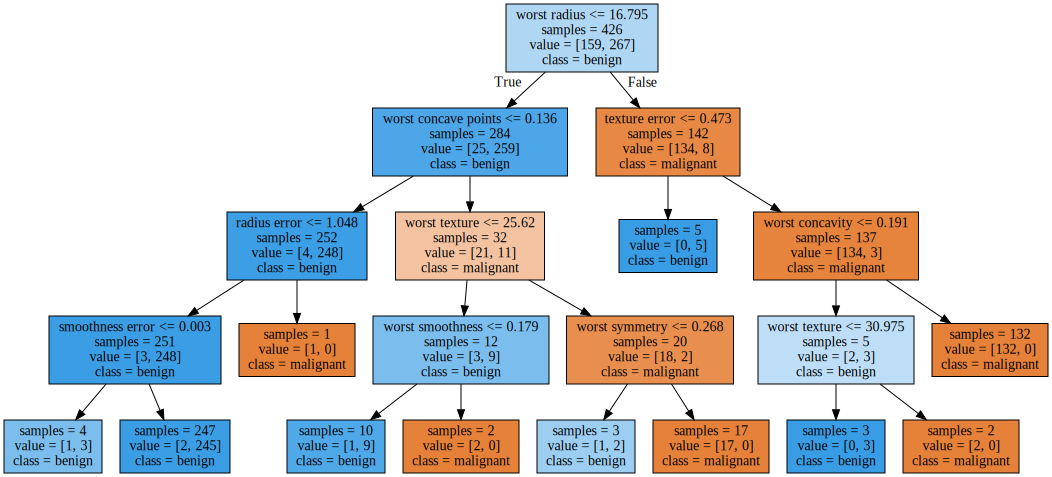

In [8]:
import graphviz
with open("/content/tree_dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [11]:
print("Feature importances:", tree.feature_importances_)
print(tree.feature_importances_.shape)
print(cancer.data.shape)

Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]
(30,)
(569, 30)


In [13]:
from matplotlib import pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [14]:
!pip install mglearn

Text(0, 0.5, 'Price in $/Mbyte')

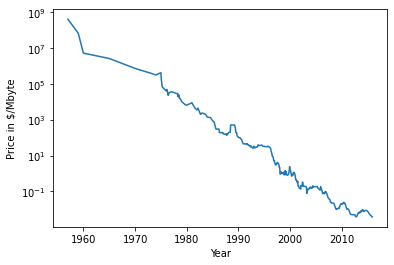

In [15]:
import mglearn
import pandas as pd
import os
import matplotlib.pyplot as plt
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
print('data_train.date.shape: ', data_train.date.shape)
X_train = data_train.date[:, np.newaxis]
print('X_train.shape: ', X_train.shape)
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.date.shape:  (202,)
X_train.shape:  (202, 1)


#RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

In [20]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, max_features=1, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [21]:
display(forest.estimators_[0])
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[1], out_file="tree_dot", class_names=["Azul", "Roja"], feature_names=["X0","X1"], impurity=False, filled=True)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1872583848, splitter='best')

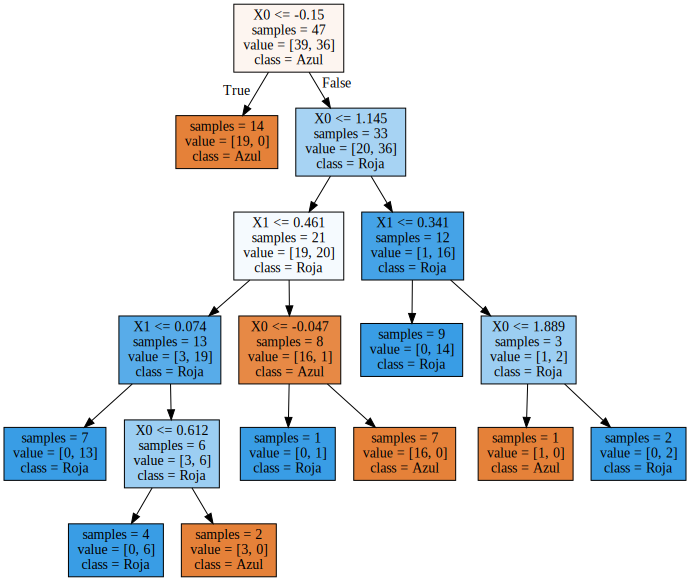

In [22]:
import graphviz
with open("/content/tree_dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

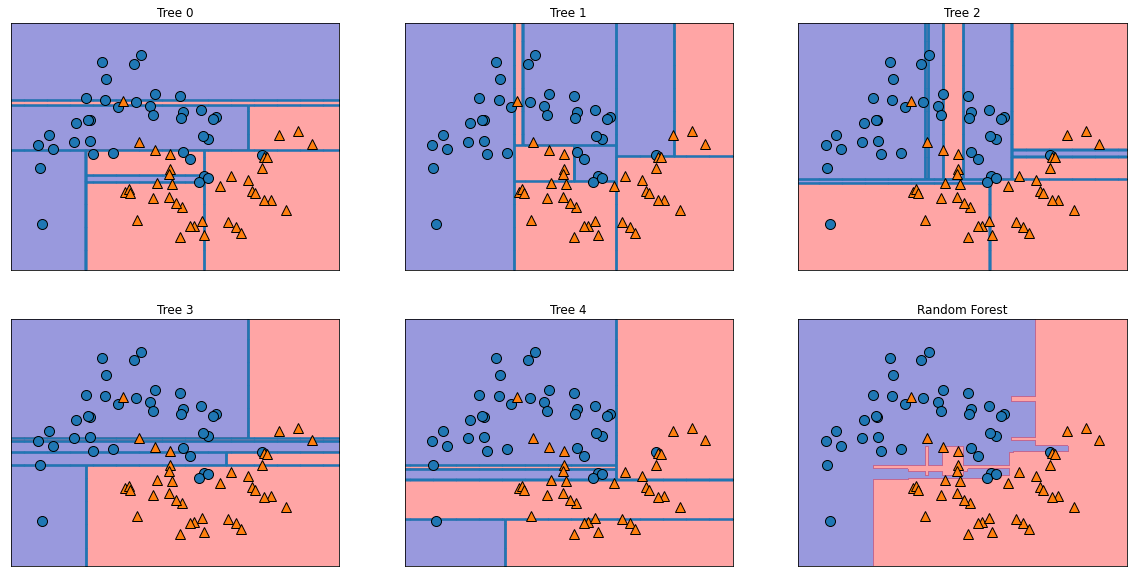

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)